In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # импортируем LDA-функционал

<div class="alert alert-info"><b>
Загрузите файл HR.csv в pandas dataframe </b>
</div>

In [56]:
URL = 'C:/Users/vokea/OneDrive/Рабочий стол/Mishin/диплом/HR.csv'

data = pd.read_csv(URL)
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<div class="alert alert-info"><b>
Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение). </b>
</div>

In [6]:
data.info() ## как видим пропусков нет, при отсутствии > 80% данных, целесообразность анализа под вопросом

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
data.describe().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [14]:
data.satisfaction_level.mode()[0] ## мода уровня удовлетворенности работой

0.1

In [17]:
data.number_project.mode()[0] ## мода кол-ва проектов, выполненных за время работы

4

In [18]:
data.average_montly_hours.mode()[0] ## мода среднего кол-ва часов на рабочем месте в месяц

135

In [19]:
data.time_spend_company.mode()[0] ## мода стажа работы в компании в годах

3

In [ ]:
data.time_spend_company.mode()[0] ## мода стажа работы в компании в годах

###### Проверим выбросы

In [20]:
q1 = data['satisfaction_level'].quantile(0.25)
q3 = data['satisfaction_level'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
result = data[data['satisfaction_level'].between(lower_bound, upper_bound, inclusive=True)].sort_values('satisfaction_level')
result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14484,0.09,0.96,6,296,4,0,1,0,technical,low
1873,0.09,0.93,6,279,4,0,1,0,technical,low
340,0.09,0.89,7,308,5,0,1,0,hr,medium
1882,0.09,0.89,6,282,4,0,1,0,support,low
332,0.09,0.98,6,271,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
4553,1.00,0.76,6,246,3,1,0,1,support,medium
4555,1.00,0.59,3,168,3,0,0,1,support,low
11122,1.00,0.77,5,269,3,0,0,0,sales,low


In [22]:
# что это за выброс?
pd.concat([data, result]).drop_duplicates(keep=False) ## получаем отсутствие выбросов по уровню удовлетворенности

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [23]:
q1 = data['number_project'].quantile(0.25)
q3 = data['number_project'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
result = data[data['number_project'].between(lower_bound, upper_bound, inclusive=True)].sort_values('number_project')
result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
7590,0.68,0.64,2,167,2,0,0,0,hr,low
7604,0.73,0.52,2,113,5,1,0,0,support,medium
7608,0.30,0.85,2,203,3,0,0,0,support,medium
7610,0.49,0.83,2,185,6,0,0,0,support,medium
...,...,...,...,...,...,...,...,...,...,...
12497,0.59,0.49,7,263,4,0,1,0,technical,medium
172,0.11,0.78,7,278,4,0,1,0,sales,low
1214,0.09,0.87,7,278,4,0,1,0,IT,low
165,0.11,0.84,7,296,4,0,1,0,sales,low


In [24]:
# что это за выброс?
pd.concat([data, result]).drop_duplicates(keep=False) ## получаем отсутствие выбросов

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


In [25]:
q1 = data['average_montly_hours'].quantile(0.25)
q3 = data['average_montly_hours'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
result = data[data['average_montly_hours'].between(lower_bound, upper_bound, inclusive=True)].sort_values('average_montly_hours')
result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
10020,0.50,0.58,4,96,3,0,0,0,sales,low
2678,0.79,0.61,5,96,4,0,0,0,marketing,medium
8605,0.48,0.43,3,96,3,0,0,0,support,low
7492,0.15,0.98,2,96,2,0,0,0,sales,high
9221,0.92,0.82,4,96,4,0,0,0,IT,medium
...,...,...,...,...,...,...,...,...,...,...
1545,0.10,0.78,6,310,4,0,1,0,sales,medium
1717,0.11,0.96,6,310,4,0,1,0,technical,low
14777,0.11,0.79,7,310,4,0,1,0,hr,low
1228,0.10,0.85,7,310,5,0,1,0,marketing,low


In [26]:
# что это за выброс?
pd.concat([data, result]).drop_duplicates(keep=False) ## получаем отсутствие выбросов

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary


<div class="alert alert-info"><b>
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные. </b>
</div>

<AxesSubplot:xlabel='satisfaction_level', ylabel='time_spend_company'>

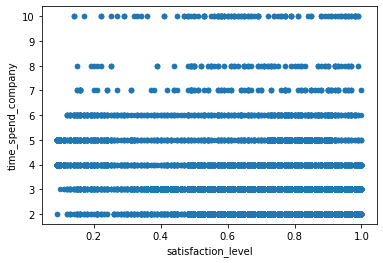

In [34]:
data.plot(kind='scatter', x='satisfaction_level', y='time_spend_company') ## уровень удовлетворенности к стажу

In [35]:
data[['satisfaction_level', 'time_spend_company']].corr(method='spearman') ## K_spearman

,satisfaction_level,time_spend_company
satisfaction_level,1.000000,-0.139428
time_spend_company,-0.139428,1.000000


In [36]:
data[['satisfaction_level', 'time_spend_company']].corr(method='kendall') ## K_kendall

,satisfaction_level,time_spend_company
satisfaction_level,1.000000,-0.110005
time_spend_company,-0.110005,1.000000


#### Вывод: обратная корреляция. Чем больше сотрудник работает в компании, тем меньше удовлетворён работой, но коэффициент близок к нулю, поэтому не стоит искать причинно-следственную связь в этих показателях.

<AxesSubplot:xlabel='satisfaction_level', ylabel='Work_accident'>

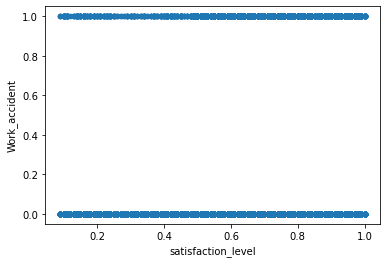

In [37]:
data.plot(kind='scatter', x='satisfaction_level', y='Work_accident') ## уровень удовлетворенности к несчастным случаям

In [38]:
data[['satisfaction_level', 'Work_accident']].corr(method='spearman') ## K_spearman

,satisfaction_level,Work_accident
satisfaction_level,1.000000,0.056333
Work_accident,0.056333,1.000000


In [39]:
data[['satisfaction_level', 'Work_accident']].corr(method='kendall') ## K_kendall

,satisfaction_level,Work_accident
satisfaction_level,1.000000,0.046298
Work_accident,0.046298,1.000000


#### Вывод: прямая корреляция, но коэффициент близок к нулю. Аналогично примеру выше.

<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

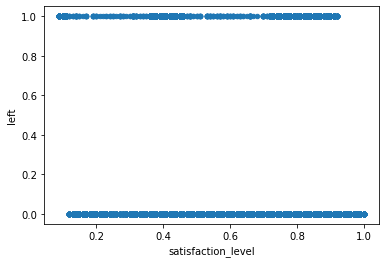

In [40]:
data.plot(kind='scatter', x='satisfaction_level', y='left') ## уровень удовлетворенности и увольнение

In [41]:
data[['satisfaction_level', 'left']].corr(method='spearman') ## K_spearman

,satisfaction_level,left
satisfaction_level,1.000000,-0.365842
left,-0.365842,1.000000


In [42]:
data[['satisfaction_level', 'left']].corr(method='kendall') ## K_kendall

,satisfaction_level,left
satisfaction_level,1.000000,-0.300675
left,-0.300675,1.000000


#### Вывод: обратная корреляция, чем больше удовлетворенность, тем меньше вероятность того, что сотрудник покинет компанию.

<AxesSubplot:xlabel='average_montly_hours', ylabel='left'>

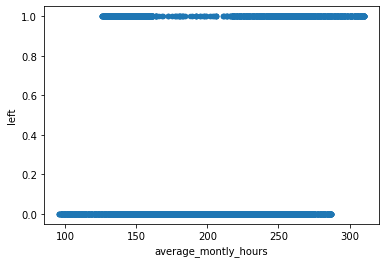

In [43]:
data.plot(kind='scatter', x='average_montly_hours', y='left') ## средняя выработка часов в месяц и увольнение

In [44]:
data[['average_montly_hours', 'left']].corr(method='spearman') ## K_spearman

,average_montly_hours,left
average_montly_hours,1.000000,0.046455
left,0.046455,1.000000


In [45]:
data[['average_montly_hours', 'left']].corr(method='kendall') ## K_kendall

,average_montly_hours,left
average_montly_hours,1.000000,0.038045
left,0.038045,1.000000


#### Вывод: прямая корреляция, чем больше средняя выработка часов в месяц, тем больше вероятность, что сотрудник покинет компанию, но коэффициент близок к нулю.

<AxesSubplot:xlabel='average_montly_hours', ylabel='number_project'>

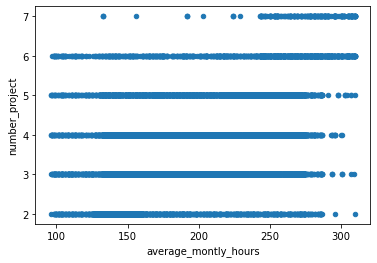

In [46]:
data.plot(kind='scatter', x='average_montly_hours', y='number_project') ## средняя выработка часов в месяц и кол-во проектов

In [47]:
data[['average_montly_hours', 'number_project']].corr(method='spearman') ## K_spearman

,average_montly_hours,number_project
average_montly_hours,1.000000,0.397855
number_project,0.397855,1.000000


In [48]:
data[['average_montly_hours', 'number_project']].corr(method='kendall') ## K_kendall

,average_montly_hours,number_project
average_montly_hours,1.000000,0.306987
number_project,0.306987,1.000000


#### Вывод: прямая корреляция, чем больше проектов, тем больше выработка в месяц.

<AxesSubplot:xlabel='left', ylabel='number_project'>

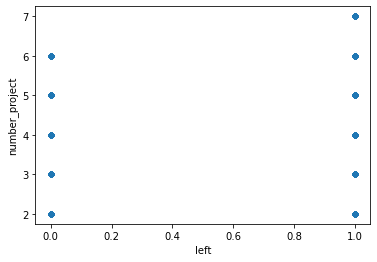

In [50]:
data.plot(kind='scatter', x='left', y='number_project') ## увольнение и кол-во проектов

In [51]:
data[['left', 'number_project']].corr(method='spearman') ## K_spearman

,left,number_project
left,1.000000,-0.019544
number_project,-0.019544,1.000000


In [52]:
data[['left', 'number_project']].corr(method='kendall') ## K_kendall

,left,number_project
left,1.000000,-0.017601
number_project,-0.017601,1.000000


#### Вывод: обратная корреляция, чем больше проектов, тем меньше вероятность увольнения. Но коэффициент близок к нулю.

<AxesSubplot:xlabel='left', ylabel='promotion_last_5years'>

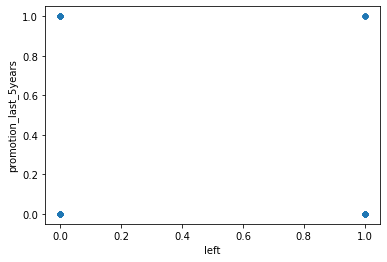

In [53]:
data.plot(kind='scatter', x='left', y='promotion_last_5years') ## повышали ли сотрудника и увольнение

In [54]:
data[['left', 'promotion_last_5years']].corr(method='spearman') ## K_spearman

,left,promotion_last_5years
left,1.000000,-0.061788
promotion_last_5years,-0.061788,1.000000


In [55]:
data[['left', 'promotion_last_5years']].corr(method='kendall') ## K_kendall

,left,promotion_last_5years
left,1.000000,-0.061788
promotion_last_5years,-0.061788,1.000000


#### Вывод: обратная корреляция, чем больше повышений, тем меньше вероятность того, что увольняются. Но коэффициент близок к нулю.

<AxesSubplot:xlabel='number_project', ylabel='promotion_last_5years'>

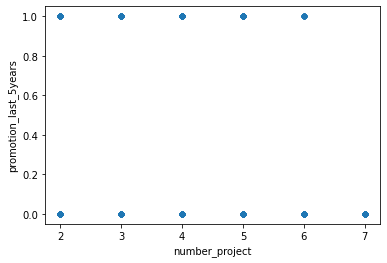

In [57]:
data.plot(kind='scatter', x='number_project', y='promotion_last_5years') ## повышали ли сотрудника и кол-во проектов

In [58]:
data[['number_project', 'promotion_last_5years']].corr(method='spearman') ## K_spearman

,number_project,promotion_last_5years
number_project,1.00000,-0.00296
promotion_last_5years,-0.00296,1.00000


In [59]:
data[['number_project', 'promotion_last_5years']].corr(method='kendall') ## K_kendall

,number_project,promotion_last_5years
number_project,1.000000,-0.002666
promotion_last_5years,-0.002666,1.000000


#### Вывод:большая часть показателей имеют низкий коэффициент корреляции. 
#### Наиболее заметна корреляция: 
#### 1. средняя выработка часов в месяц и кол-во проектов (-0.39 по Спирману)
#### 2. уровень удовлетворенности к стажу (-0.139 по Спирману)

#### Наименее заметна корреляция: 
#### 1. повышали ли сотрудника и кол-во проектов (-0.029 по Спирману)
#### 2. увольнение и кол-во проектов (-0.019 по Спирману)

<div class="alert alert-info"><b>
Рассчитайте сколько сотрудников работает в каждом департаменте. </b>
</div>

In [65]:
data['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [70]:
department_count = data[['department', 'satisfaction_level']].groupby('department').count()
department_count

,satisfaction_level
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


<div class="alert alert-info"><b>
Показать распределение сотрудников по зарплатам. </b>
</div>

In [85]:
count_people_for_salary = data[['salary', 'satisfaction_level']].groupby('salary').count()
count_people_for_salary

,satisfaction_level
salary,
high,1237
low,7316
medium,6446


<AxesSubplot:title={'center':'Count_people_for_salary'}, xlabel='Salary', ylabel='Count people'>

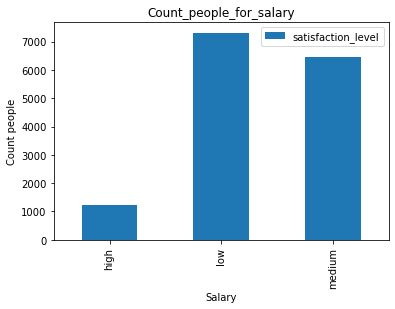

In [86]:
count_people_for_salary.plot(kind='bar', 
                          title='Count_people_for_salary',
                          xlabel='Salary',
                          ylabel='Count people')

<div class="alert alert-info"><b>
Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности </b>
</div>

In [91]:
count_people_for_salary_department = data[['salary', 'department', 'satisfaction_level']].groupby(['salary', 'department']).count()
count_people_for_salary_department

satisfaction_level
salary department                     
high   IT                           83
       RandD                        51
       accounting                   74
       hr                           45
       management                  225
       marketing                    80
       product_mng                  68
       sales                       269
       support                     141
       technical                   201
low    IT                          609
       RandD                       364
       accounting                  358
       hr                          335
       management                  180
       marketing                   402
       product_mng                 451
       sales                      2099
       support                    1146
       technical                  1372
medium IT                          535
       RandD                       372
       accounting                  335
       hr                          359
       management                  225
       marketing                   376
       product_mng                 383
       sales                      1772
       support                     942
       technical                  1147

<AxesSubplot:title={'center':'Count_people_for_salary_by_department'}, xlabel='Salary', ylabel='Count people'>

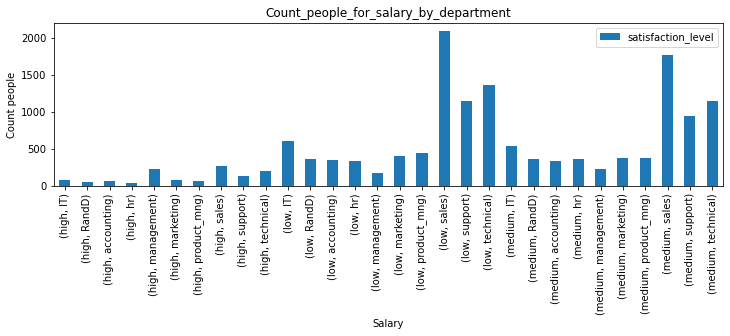

In [102]:
count_people_for_salary_department.plot(kind='bar', 
                          title='Count_people_for_salary_by_department',
                          xlabel='Salary',
                          ylabel='Count people',
                                    figsize=(12, 3))

<div class="alert alert-info"><b>
Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом </b>
</div>

In [121]:
people_low_salary = data.loc[data['salary'] == 'low']
people_low_salary.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [142]:
people_low_salary.salary.count()

7316

In [138]:
people_low_salary.average_montly_hours.mean()

200.9965828321487

In [125]:
people_medium_salary = data.loc[data['salary'] == 'medium']
people_medium_salary.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [126]:
people_medium_salary.salary.count()

6446

In [143]:
people_medium_salary.average_montly_hours.mean()

201.33834936394663

In [128]:
people_high_salary = data.loc[data['salary'] == 'high']
people_high_salary.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high


In [129]:
people_high_salary.salary.count()

1237

In [144]:
people_high_salary.average_montly_hours.mean()

199.86742118027485

#### Вывод по гипотезе: гипотеза не верна. Сотрудники с низким окладом работают в среднем в месяц 200.99 час, в то время как сотрудники с высоким окладом: 199.86

<div class="alert alert-info"><b>
Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): </b>
1. Доля сотрудников с повышением за последние 5 лет
2. Средняя степень удовлетворенности
3. Среднее количество проектов
</div>

In [181]:
employee_quit = data.loc[data['left'] == 1] ## сотрудники уволились
employee_quit.salary.count() ## всего сотрудников уволившихся

3571

In [182]:
employee_not_quit = data.loc[data['left'] == 0] ## сотрудники не уволились
employee_not_quit.salary.count() ## всего сотрудников неуволившихся

11428

In [183]:
employee_quit_with_promotion = employee_quit.loc[employee_quit['promotion_last_5years'] == 1]
employee_quit_with_promotion.salary.count() ## сотрудники с повышением, но уволены

19

In [184]:
employee_not_quitwith_promotion = employee_not_quit.loc[employee_not_quit['promotion_last_5years'] == 1]
employee_not_quitwith_promotion.salary.count() ## сотрудники с повышением и не уволены

300

In [188]:
part_1 = employee_quit_with_promotion.salary.count() / employee_quit.salary.count()
part_1 ## доля сотрудников с повышением из числа уволенных

0.005320638476617194

In [189]:
part_2 = employee_not_quitwith_promotion.salary.count() / employee_not_quit.salary.count()
part_2 ## доля сотрудников с повышением из числа не уволенных

0.026251312565628283

In [190]:
employee_quit.satisfaction_level.mean() ## средняя степень удовлетвореенности работой среди уволившихся

0.44009801176140917

In [191]:
employee_not_quit.satisfaction_level.mean() ## средняя степень удовлетвореенности работой среди не уволившихся

0.666809590479516

In [192]:
employee_quit.number_project.mean() ## среднее кол-во проектов среди уволившихся

3.8555026603192384

In [193]:
employee_not_quit.number_project.mean() ## среднее кол-во проектов среди не уволившихся

3.786664333216661

<div class="alert alert-info"><b>
Разделить данные на тестовую и обучающую выборки </b>
Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)
Оценить качество модели на тестовой выборки
</div>

In [269]:
lda = LinearDiscriminantAnalysis()

In [270]:
data_wuthout = data[['left', 'satisfaction_level']]

In [271]:
X_train, y_train = data_wuthout[:51], data_wuthout[51:101]

In [272]:
x_new = np.array(X_train).reshape(1, -1)
y_new = np.array(y_train).reshape(1, -1)

In [273]:
# lda.fit(x_new, y_new)